In [30]:
# import packages

# utilities
from datetime import datetime
from calendar import monthrange

# for manipulating the data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# for requesting real time data
import requests
from pytrends.request import TrendReq

# machine learning related modules
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import models
register_matplotlib_converters()

In [2]:
keywords_list = ["bitcoin", "cryptocurrency"]
pytrend = TrendReq()
data = []
for year in (2017, 2018, 2019, 2020):
    for month in range(1,13):
        print(f"getting data for {month}/{year}")
        number_of_days = monthrange(year, month)[1]
        data.append(pytrend.get_historical_interest(keywords=keywords_list, year_start=year, year_end=year, month_start=month, month_end =month,day_start=1, day_end=number_of_days))
historical_trend_dt = pd.concat(data)
historical_trend_dt.drop(columns="isPartial", inplace=True)
historical_trend_dt

getting data for 1/2017
getting data for 2/2017
getting data for 3/2017
getting data for 4/2017
getting data for 5/2017
getting data for 6/2017
getting data for 7/2017
getting data for 8/2017
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
getting data for 9/2017
getting data for 10/2017
getting data for 11/2017
getting data for 12/2017
getting data for 1/2018
getting data for 2/2018
getting data for 3/2018
getting data for 4/2018
getting data for 5/2018
getting data for 6/2018
getting data for 7/2018
getting data for 8/2018
getting data for 9/2018
getting data for 10/2018
getting data for 11/2018
getting data for 12/2018
getting data for 1/2019
getting data for 2/2019
getting data for 3/2019
getting data for 4/2019
getting data for 5/2019
getting data for 6/2019
getting data for 7/2019
getting data for 8/2019
getting data for 9/2019
getting data for 10/2019
getting data for 11/2019
getting data for 12/2019
getting data for 1/2020
getting data 

,bitcoin,cryptocurrency
date,,
2017-01-01 00:00:00,31,1
2017-01-01 01:00:00,30,1
2017-01-01 02:00:00,32,1
2017-01-01 03:00:00,34,1
2017-01-01 04:00:00,29,1
...,...,...
2020-12-30 20:00:00,46,2
2020-12-30 21:00:00,47,2
2020-12-30 22:00:00,47,2


In [32]:
df = pd.read_csv(r"bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727777 entries, 0 to 4727776
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 288.6 MB


In [4]:
df.shape

(4727777, 8)

In [5]:
date_range_start = datetime(2017, 1, 1)
df['Timestamp'] = [datetime.fromtimestamp(x) for x in df['Timestamp']]
df = df[(df['Timestamp'] >= date_range_start)]
df = df.set_index(['Timestamp'])
df.dropna(axis=0,how='any',inplace=True)
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2017-01-01 00:00:00,956.98,956.98,956.22,956.22,0.664329,635.321416,956.334967
2017-01-01 00:06:00,957.22,957.22,957.22,957.22,0.500000,478.610000,957.220000
2017-01-01 00:07:00,958.00,958.00,958.00,958.00,0.022501,21.556044,958.000000
2017-01-01 00:08:00,958.17,958.17,958.17,958.17,0.012553,12.027649,958.170000
2017-01-01 00:10:00,958.32,958.32,958.32,958.32,0.015000,14.374800,958.320000


In [6]:
# merging the historical trend data
data_df = pd.merge(df,historical_trend_dt, how='left', left_index=True, right_index=True)
data_df.interpolate(method="nearest", axis=0, inplace=True)
data_df.drop(data_df.tail(480).index,inplace=True)
data_df.tail()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,bitcoin,cryptocurrency
2020-12-30 23:56:00,28116.11,28117.56,28086.57,28103.51,2.511993,70596.357872,28103.720384,48.0,2.0
2020-12-30 23:57:00,28103.52,28144.26,28103.52,28128.83,2.410717,67813.839563,28130.148610,48.0,2.0
2020-12-30 23:58:00,28144.26,28182.70,28143.21,28143.21,3.175759,89422.417285,28157.805353,48.0,2.0
2020-12-30 23:59:00,28144.00,28165.10,28124.77,28147.11,4.523498,127329.685430,28148.499379,48.0,2.0
2020-12-31 00:00:00,28160.90,28200.00,28160.90,28188.55,8.949974,252322.689850,28192.561528,48.0,2.0


In [7]:
data_df.isnull().values.any()

False

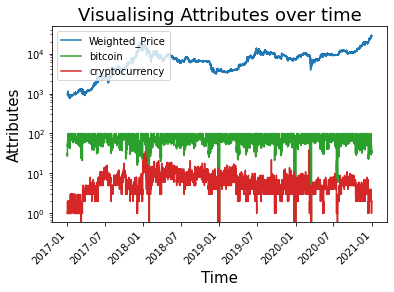

In [8]:
ax = data_df.plot(use_index=True, y="Weighted_Price", kind="line", logy=True)
data_df.plot(use_index=True, y="bitcoin", ax=ax, color="C2", logy=True)
data_df.plot(use_index=True, y="cryptocurrency", ax=ax, color="C3", logy=True)

plt.xlabel('Time',fontsize=15)
plt.ylabel('Attributes',fontsize=15)
plt.xticks(rotation=45)

plt.title('Visualising Attributes over time',fontsize=18)
plt.show()

In [9]:
test_size = int(len(data_df) * 0.1)
train = data_df.iloc[:-test_size,:].copy()
test = data_df.iloc[-test_size:,:].copy()
print(train.shape, test.shape)

(1813492, 9) (201499, 9)


In [10]:
X_train = train.drop("Weighted_Price",axis=1).copy()
y_train = train[["Weighted_Price"]].copy()
print(X_train.shape, y_train.shape)

(1813492, 8) (1813492, 1)


In [11]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

(1813492, 8)
(1813492, 1)
(1813492,)


In [12]:
n_input = 100 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features = X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 1000 # Number of timeseries samples in each batch

In [ ]:
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

Creating LSTM model for prediction

In [13]:
model = models.Sequential()

model.add(LSTM(50,return_sequences = False,input_shape=(n_input, n_features),activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                11800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


Training model

In [14]:
model.fit_generator(generator,epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
1814/1814 [==============================] - 208s 114ms/step - loss: 8.1670e-04
Epoch 2/5
1814/1814 [==============================] - 227s 125ms/step - loss: 6.7480e-05
Epoch 3/5
1814/1814 [==============================] - 165s 91ms/step - loss: 6.0693e-05
Epoch 4/5
1814/1814 [==============================] - 175s 96ms/step - loss: 2.3368e-06
Epoch 5/5
1814/1814 [==============================] - 189s 104ms/step - loss: 2.7284e-05


Visualising training and validation loss.

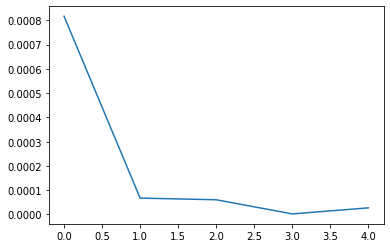

In [15]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

Making predictions on test data

In [16]:
X_test = test.drop("Weighted_Price",axis=1).copy()
scaled_X_test = Xscaler.transform(X_test)
test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=n_input, batch_size=b_size)
print(test_generator[0][0].shape)

(1000, 25, 8)


In [17]:
y_pred_scaled = model.predict(test_generator)

In [18]:
y_pred = Yscaler.inverse_transform(y_pred_scaled)
results = pd.DataFrame({'y_true':test["Weighted_Price"].values[n_input:],'y_pred':y_pred.ravel()})
print(results)

              y_true        y_pred
0       11853.010725  11701.131836
1       11860.044634  11700.517578
2       11857.848791  11700.356445
3       11855.676185  11701.685547
4       11852.507788  11699.980469
...              ...           ...
201469  28103.720384  27589.033203
201470  28130.148610  27579.636719
201471  28157.805353  27580.236328
201472  28148.499379  27590.253906
201473  28192.561528  27590.191406

[201474 rows x 2 columns]


<AxesSubplot:>

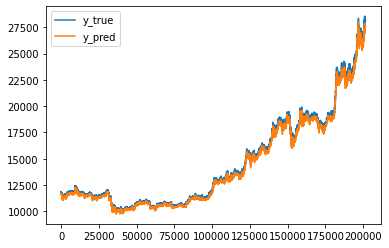

In [19]:
results.plot()

In [20]:
from sklearn.metrics import r2_score
score = r2_score(test["Weighted_Price"].values[n_input:],y_pred)
score

0.9964591556108092

Here we can see both the curves have overlapped and the r2_score is almost 1 which tells us that the model is able to generate good results.

In [21]:
def get_last_minute_data():   
    timeNow = datetime.now()
    df = pytrend.get_historical_interest(keywords=keywords_list, year_start=timeNow.year, year_end=timeNow.year, month_start=timeNow.month, month_end=timeNow.month,day_start=timeNow.day, day_end=timeNow.day)
    df.drop(columns="isPartial", inplace=True)
    trend = df.to_dict(orient="records")[0]
    query = {
        "symbol": "BTCUSDT",
        "interval": "1m",
        "limit": 1000
    }
    live_data = requests.get("https://api.binance.com/api/v3/klines", params=query).json()
    minutes = {
        "Open": [minute[1] for minute in live_data],
        "High": [minute[2] for minute in live_data],
        "Low": [minute[3] for minute in live_data],
        "Close": [minute[4] for minute in live_data],
        "Volume_(BTC)": [minute[5] for minute in live_data],
        "Volume_(Currency)": [minute[7] for minute in live_data],
    }
    for keyword, value in trend.items():
        minutes[keyword] = [value for i in range(len(live_data))]
    return pd.DataFrame(minutes)

In [22]:
def get_future_price():
    realtime_test = get_last_minute_data()
    realtime_test = Xscaler.transform(realtime_test)
    realtime_test_generator = TimeseriesGenerator(realtime_test, np.zeros(len(realtime_test)), length=n_input, batch_size=1)
    realtime_pred_scaled = model.predict(realtime_test_generator)
    realtime_pred = Yscaler.inverse_transform(realtime_pred_scaled)
    realtime_results = pd.DataFrame({'realtime_pred':realtime_pred.ravel()})
    return realtime_results.iloc[-1]["realtime_pred"]

In [23]:
def get_current_price():
    query = {
        "symbol": "BTCUSDT",
    }
    live_data = requests.get("https://api.binance.com/api/v3/avgPrice", params=query).json()
    return live_data["price"]

In [24]:
from time import sleep

In [31]:
correct = 0
for i in range(1,15):
    print("-------------------")
    current_price = get_current_price()
    prediction_price = get_future_price()
    predict_direction = "rise" if float(current_price) <= float(prediction_price) else "drop"
    print("--prediction")
    print(f"actual current price: {str(current_price)}")
    print(f"predicted direction: {predict_direction}")
    print(f"predicted target price: {str(prediction_price)}")
    sleep(60)
    actual_price = get_current_price()
    actual_direction = "rise" if float(current_price) <= float(actual_price) else "drop"
    print("--actual")
    print(f"actual direction after a minute: {actual_direction}")
    print(f"actual price after a minute: {str(actual_price)}")
    print("--analysis")
    if predict_direction == actual_direction:
        correct = correct + 1
    percentDifference = abs((float(prediction_price) - float(actual_price)) / float(prediction_price))
    print(f"the percentage difference: {str(percentDifference)}%")

-------------------
The request failed: Google returned a response with code 400.
--prediction
actual current price: 49439.07260461
predicted direction: rise
predicted target price: 49474.0
--actual
actual direction after a minute: rise
actual price after a minute: 49459.81066981
--analysis
the percentage difference: 0.00028680377956094403%
-------------------
The request failed: Google returned a response with code 400.
--prediction
actual current price: 49459.85745479
predicted direction: rise
predicted target price: 49460.29
--actual
actual direction after a minute: rise
actual price after a minute: 49522.15017867
--analysis
the percentage difference: 0.0012507228999780531%
-------------------
HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
The request failed: Google returned a response with code 400.


KeyError: "['isPartial'] not found in axis"